In [2]:
#importing the required modules
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualising
import seaborn as sns #statistical data visualization
%matplotlib inline

In [3]:
#importing the dataset
df=pd.read_csv('animals.csv')

In [4]:
#dimensions of dataset
df.shape

(101, 18)

In [5]:
#dataset preview
df.head()

,animal names,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
#getting overall info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal names  101 non-null    object
 1   hair          101 non-null    int64 
 2   feathers      101 non-null    int64 
 3   eggs          101 non-null    int64 
 4   milk          101 non-null    int64 
 5   airborne      101 non-null    int64 
 6   aquatic       101 non-null    int64 
 7   predator      101 non-null    int64 
 8   toothed       101 non-null    int64 
 9   backbone      101 non-null    int64 
 10  breathes      101 non-null    int64 
 11  venomous      101 non-null    int64 
 12  fins          101 non-null    int64 
 13  legs          101 non-null    int64 
 14  tail          101 non-null    int64 
 15  domestic      101 non-null    int64 
 16  catsize       101 non-null    int64 
 17  type          101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
#drop unnecessary columns
#drop animal names column
df=df.drop('animal names',axis=1)

In [8]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
#Explore the target variable "type"
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [10]:
#check if there are missing values
df.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [11]:
#No missing values
#seperating the dependent and independent variables
X=df.drop(['type'],axis=1)
y=df['type']

In [12]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
X_train.shape,X_test.shape

((80, 16), (21, 16))

In [14]:
#import randomforestclassifier and instantiate
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_features=0.7,bootstrap=True,max_depth=10,min_samples_leaf=2,random_state=0)


In [15]:
#fit the model
%time model.fit(X_train,y_train)

Wall time: 229 ms


RandomForestClassifier(max_depth=10, max_features=0.7, min_samples_leaf=2,
                       random_state=0)

In [16]:
#predict  the test set results
y_pred=model.predict(X_test)
#check accuracy score
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy score',accuracy_score(y_test,y_pred))
print("precision Score",precision_score(y_test,y_pred,average="weighted"))
print("Recall score",recall_score(y_test,y_pred,average="weighted"))
#ACuuracy with default n_estimators=100

Accuracy score 0.9523809523809523
precision Score 0.9523809523809523
Recall score 0.9523809523809523


C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix',cm)


confusion matrix [[12  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  1]]


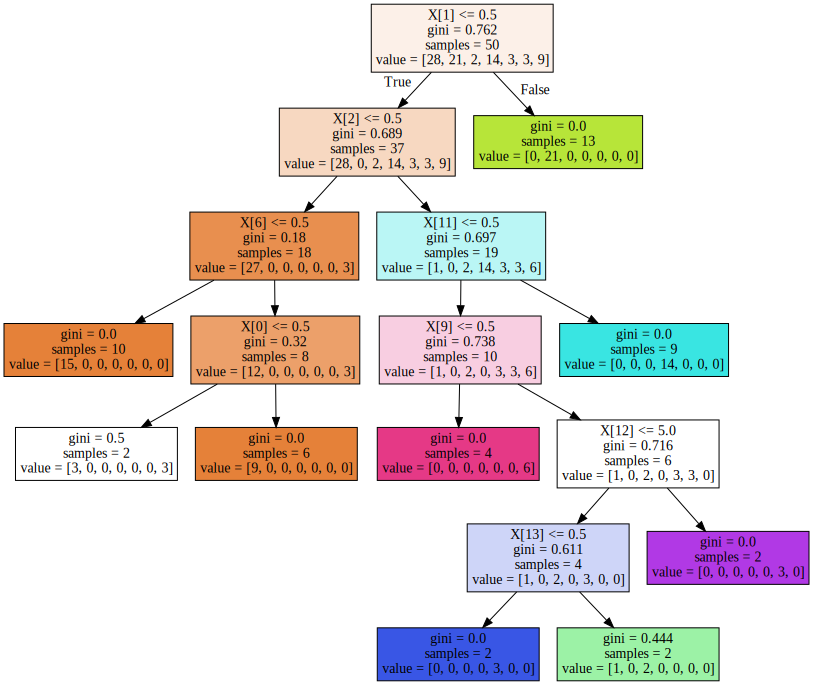

In [19]:
#plotting a random tree from the model
from sklearn.tree import export_graphviz
import graphviz
esti=model.estimators_[4]
dot_data=export_graphviz(esti,out_file=None,filled=True,impurity=True)
graph=graphviz.Source(dot_data)
graph

In [20]:
#Finding feature importance  in Random Forest model
feature_scores=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

milk        0.269827
feathers    0.219002
fins        0.117529
backbone    0.064889
hair        0.054660
eggs        0.052247
breathes    0.040722
legs        0.039899
toothed     0.035762
aquatic     0.035760
tail        0.034802
airborne    0.020982
predator    0.011998
venomous    0.001057
catsize     0.000862
domestic    0.000003
dtype: float64

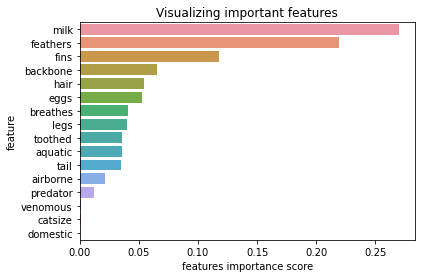

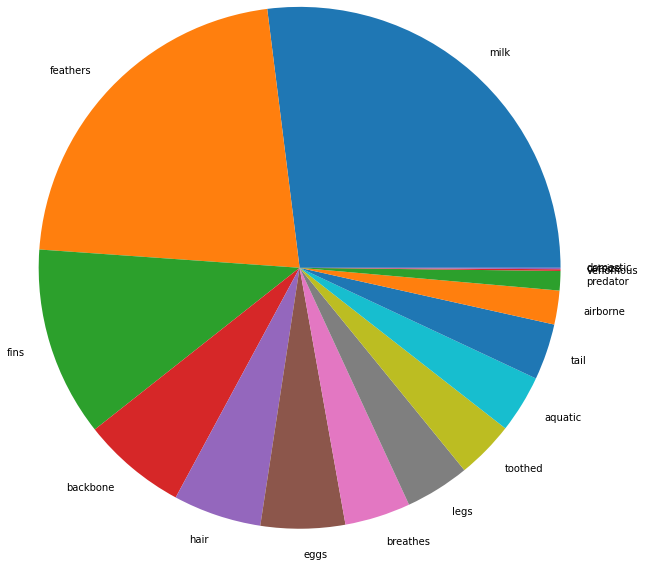

In [21]:
#visualising the feature importance
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('features importance score')
plt.ylabel('feature')
plt.title("Visualizing important features")
plt.show()
plt.pie(feature_scores,labels=feature_scores.index,radius=3)
plt.show()

<AxesSubplot:>

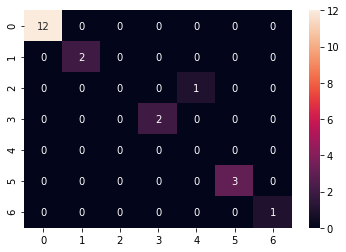

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [23]:
#report of the final classification
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saika\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [24]:
#multicollinearity in the dataset
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


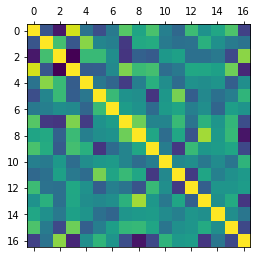

In [25]:
plt.matshow(df.corr())
plt.show()

In [29]:
model.score(X_train,y_train)

1.0

In [27]:
model.score(X_test,y_test)

0.9523809523809523

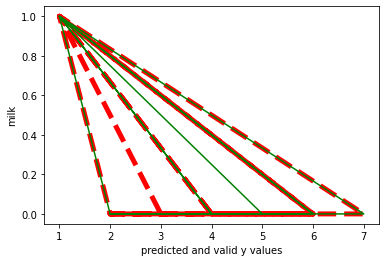

In [51]:
#plotting y_test,y_pred variables for first three important x variables milk,feathers,fins
plt.plot(y_test,X_test["milk"],'r--',linewidth=5)
plt.plot(y_pred,X_test["milk"],'g')
plt.ylabel("milk")
plt.xlabel("predicted and valid y values")
plt.show()

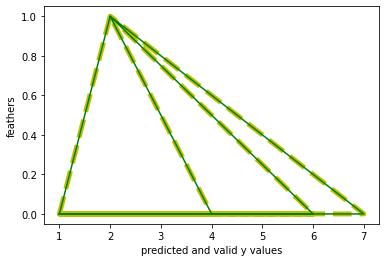

In [52]:
plt.plot(y_test,X_test["feathers"],'y--',linewidth=5)
plt.plot(y_pred,X_test["feathers"],'g')
plt.ylabel("feathers")
plt.xlabel("predicted and valid y values")
plt.show()

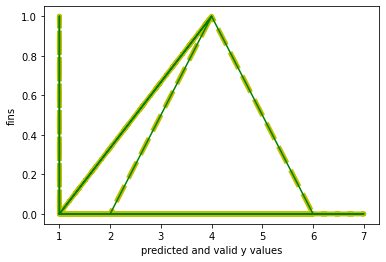

In [53]:
plt.plot(y_test,X_test["fins"],'y--',linewidth=5)
plt.plot(y_pred,X_test["fins"],'g')
plt.ylabel("fins")
plt.xlabel("predicted and valid y values")
plt.show()
#In almost all the cases predicted values are equal to the test values